# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


We are going to work with 2 datasets 
1. COVID 19 dataset published by John Hopkins University which contains the data related to cumulative number of confirmed cases in different countries per day
2. This dataset is related to World Happiness Report, it is an annual publication of the United Nations

###  Importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv".


In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [14]:
corona_dataset_csv.shape

(266, 104)

### DATA WRANGLING

### Delete the useless columns 

In [15]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [16]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Aggregating the rows by the country

In [17]:
corona_dataset_aggregated=corona_dataset_csv.groupby("Country/Region").sum()

In [18]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [19]:
corona_dataset_aggregated.shape

(187, 100)

## VISUALIZATION OF DATA

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

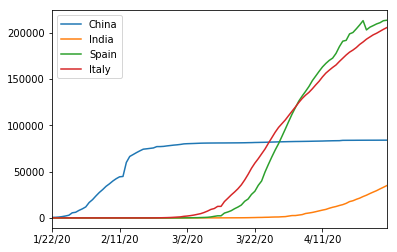

In [20]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
plt.legend()

###  Calculating a good measure 
We need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

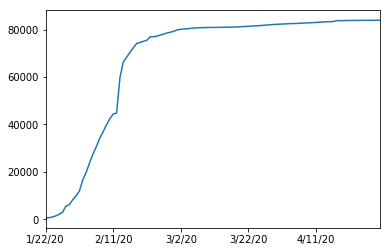

In [21]:
corona_dataset_aggregated.loc['China'].plot()

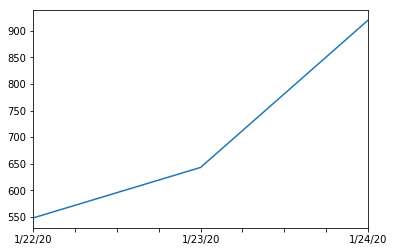

In [22]:
corona_dataset_aggregated.loc["China"][:3].plot()

### Calculating the first derivative of the curve
To calculate the maximum infected rate in a country, we calculate the first derivative

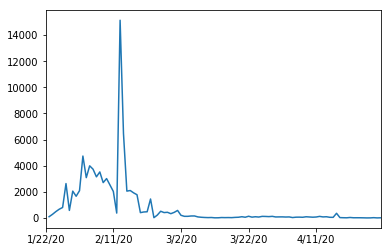

In [23]:
corona_dataset_aggregated.loc["China"].diff().plot()

### Find maxmimum infection rate for China, Italy, Spain and India

In [24]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [25]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [26]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [52]:
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

### Find maximum infection rate for all of the countries. 

In [27]:
countries = list(corona_dataset_aggregated.index)
max_inf_rates=[]
for c in countries:
    max_inf_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_inf_rate"]=max_inf_rates

In [28]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_inf_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Create a new dataframe with only needed column 

In [29]:
corona_data=pd.DataFrame(corona_dataset_aggregated["max_inf_rate"])

In [30]:
corona_data.head()

,max_inf_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Importing the dataset

In [31]:

body = client_cba309d7e8d34331b232eef8e7d3d201.get_object(Bucket='covid19analysisusingpython-donotdelete-pr-pval6nir8lffth',Key='worldwide_happiness_report.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

happiness_report_csv = pd.read_csv(body)



In [32]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Drop the useless columns 
We are droping the useless columns as they are no longer needed for the analysis

In [33]:
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [34]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [35]:
happiness_report_csv.set_index("Country or region",inplace=True)

In [36]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Now let's join two dataset we have prepared
Joining the two cleaned dataasets as corona dataset by inner join

#### Corona Dataset :

In [37]:
corona_data.head()

,max_inf_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [38]:
corona_data.shape

(187, 1)

#### World happiness report Dataset :

In [39]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [40]:
happiness_report_csv.shape

(156, 4)

In [41]:
data=corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_inf_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Correlation matrix 
To find the correlation between the attributes

In [42]:
data.corr()

,max_inf_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_inf_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


It shows the positive correlation between the attributes

###  Visualization of the results
Visualize the results in terms of figures and graphs for easy analysis

In [43]:
data.head()

,max_inf_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

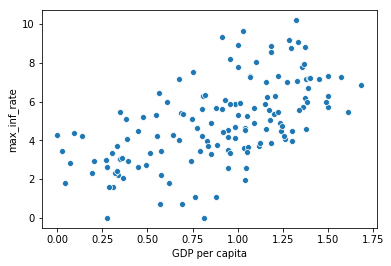

In [44]:
x=data["GDP per capita"]
y=data["max_inf_rate"]
sns.scatterplot(x,np.log(y))

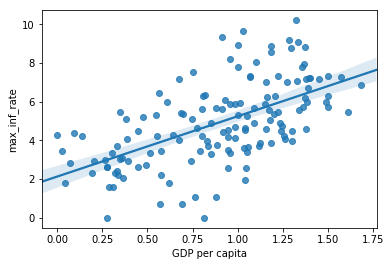

In [45]:
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

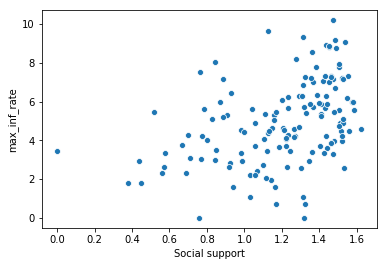

In [46]:
x=data["Social support"]
y=data["max_inf_rate"]
sns.scatterplot(x,np.log(y))


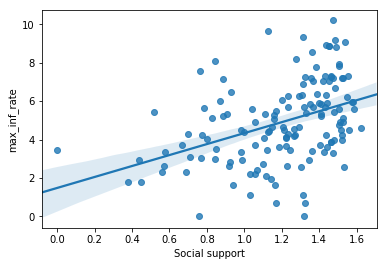

In [47]:
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

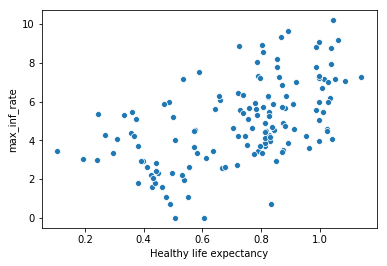

In [48]:
x=data["Healthy life expectancy"]
y=data["max_inf_rate"]
sns.scatterplot(x,np.log(y))

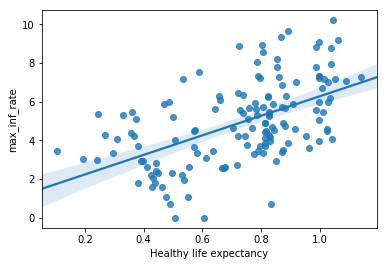

In [49]:
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

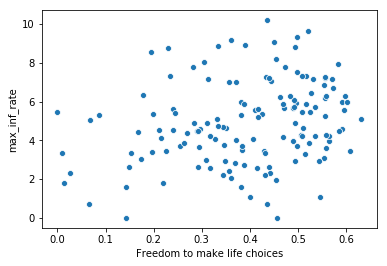

In [50]:
x=data["Freedom to make life choices"]
y=data["max_inf_rate"]
sns.scatterplot(x,np.log(y))

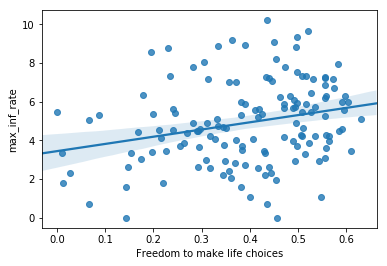

In [51]:
sns.regplot(x,np.log(y))